sigma^2 = lambda * sigma(prev)^2 + (1-lambda)return^2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import data_reader as dr

In [2]:
data= dr.read()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2321 entries, 22 to 2483
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 2321 non-null   object 
 1   Daily_trading_range  2321 non-null   float64
 2   Log_Volume_change    2321 non-null   float64
 3   Daily_return         2321 non-null   float64
 4   Daily_log_return     2321 non-null   float64
 5   Past_vol22           2321 non-null   float64
 6   gold                 2321 non-null   float64
 7   oil                  2321 non-null   float64
 8   Target22             2300 non-null   float64
 9   Target10             2312 non-null   float64
dtypes: float64(9), object(1)
memory usage: 199.5+ KB


In [57]:
data = data.drop(['Daily_return'], axis=1)
data['Squared_return'] = data['Daily_log_return']**2
data.head(30)

,Date,Daily_trading_range,Log_Volume_change,Daily_log_return,Past_vol22,gold,oil,Target22,Target10,Squared_return
22,2011-01-03,15.260010,14.632111,0.009260,0.088908,1422.599976,91.550003,NaN,NaN,0.000086
23,2011-01-04,16.019776,16.086549,0.007249,0.086037,1378.500000,89.379997,NaN,NaN,0.000053
24,2011-01-05,10.219971,-7.434844,-0.001243,0.087213,1373.400024,90.300003,NaN,NaN,0.000002
25,2011-01-06,30.549804,5.468045,-0.002375,0.087567,1371.400024,88.379997,NaN,NaN,0.000006
26,2011-01-07,17.540039,-19.485688,0.004126,0.087481,1368.500000,88.029999,NaN,NaN,0.000017
27,2011-01-10,19.339844,2.064361,-0.002587,0.086771,1373.699951,89.250000,NaN,NaN,0.000007
28,2011-01-11,28.650146,18.178629,0.003603,0.071253,1384.000000,91.110001,NaN,NaN,0.000013
29,2011-01-12,12.010010,5.308045,0.003170,0.070128,1385.699951,91.860001,NaN,NaN,0.000010
30,2011-01-13,25.540039,-2.122529,-0.002614,0.071367,1386.900024,91.400002,NaN,NaN,0.000007
31,2011-01-14,31.729981,0.117800,0.008905,0.073778,1360.400024,91.540001,NaN,0.088282,0.000079


In [4]:
data_cleaned = data[21:]
data_cleaned.head()

,Date,Daily_trading_range,Log_Volume_change,Daily_return,Daily_log_return,Past_vol22,gold,oil,Target22,Target10
43,2011-02-01,14.830079,-9.849380,0.001111,0.001111,0.121073,1331.500000,90.860001,0.121307,0.161345
44,2011-02-07,26.100098,-1.699365,0.004686,0.004675,0.118032,1352.300049,90.540001,0.118105,0.155932
45,2011-02-08,25.719971,4.913988,-0.005784,-0.005800,0.117012,1348.300049,89.029999,0.117141,0.157304
46,2011-02-09,39.820068,10.396094,-0.011654,-0.011722,0.123197,1347.599976,87.480003,0.123905,0.141155
47,2011-02-10,34.569946,-7.281598,-0.018127,-0.018293,0.136661,1363.400024,86.940002,0.138926,0.168290


In [5]:
sqreturn = np.array(data_cleaned['Daily_log_return']**2)
target = np.array(data_cleaned[['Target22']])
target = pd.DataFrame(target)


In [6]:
trainSize = int(len(sqreturn)*0.8)
testSize = len(sqreturn) - trainSize
# Training session

trainX = sqreturn[:trainSize]
trainY = target[:trainSize]

testX = sqreturn[trainSize:]
testY = target[trainSize:]


In [7]:
pred_vol = []
lamb=0.94
pred_vol.append(data_cleaned['Past_vol22'].iloc[0] / np.sqrt(252))

for i in range(trainSize-1):
    pred = lamb*(pred_vol[-1]**2) + (1-lamb)*sqreturn[i]
    pred_vol.append(np.sqrt(pred))

prev_vol = pred_vol[-1]
pred_vol = pd.DataFrame(pred_vol)
pred_vol = pred_vol * np.sqrt(252)
pred_vol

,0
0,0.121073
1,0.117464
2,0.115327
3,0.114066
4,0.119617
...,...
1835,0.169991
1836,0.167826
1837,0.165858
1838,0.168879


In [8]:
trainY

,0
0,0.121307
1,0.118105
2,0.117141
3,0.123905
4,0.138926
...,...
1835,0.165303
1836,0.164646
1837,0.168999
1838,0.169964


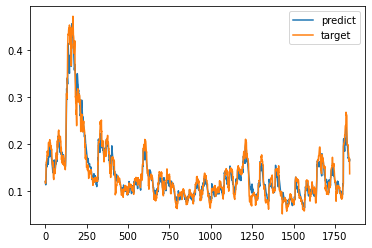

In [9]:
plt.plot(pred_vol.iloc[:], label='predict')
plt.plot(trainY.iloc[:], label='target')
plt.legend()
plt.show()

In [10]:
import metrics as mt

In [11]:
mt.testScore(pred_vol.iloc[1:], trainY.iloc[1:])

test Score: 0.00023857941885161333 MSE
test Score: 0.015446016277720716 RMSE
test Score: 0.08205717910898687 MAPE
test Score: 0.9462250497464776 R2 score


In [54]:
# test
lamb=0.92
test_pred = []
test_pred.append(prev_vol)
for i in range(trainSize, len(sqreturn)):
    test_vol = lamb*(test_pred[-1]**2) + (1-lamb)*sqreturn[i]
    test_pred.append(np.sqrt(test_vol))

test_pred = pd.DataFrame(test_pred)
test_pred = np.sqrt(252)*test_pred
test_target = np.array(target.iloc[len(sqreturn)-testSize:])
test_target = pd.DataFrame(test_target)

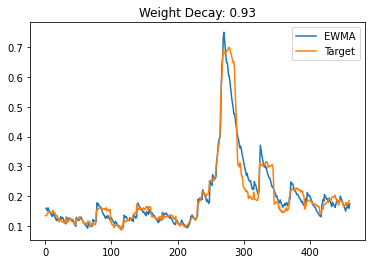

In [55]:
plt.plot(test_pred[1:], label='EWMA')
plt.plot(test_target, label='Target')
plt.title('Weight Decay: 0.93')
plt.legend()
# plt.savefig('images/EWMA.png')
plt.show()

In [56]:
mt.testScore(test_pred[1:], test_target)

test Score: 0.0010871435947499408 MSE
test Score: 0.03297186065040826 RMSE
test Score: 0.09367900397206987 MAPE
test Score: 0.9279384422675425 R2 score
